#Google Play Store Data Analytics

##The Google Play Store Data Analytics will contain the following tasks given by the NullClass. The project will follow the ETL (Extract Transform and Load) process to clean, understand and manipulate data. The project will be done in Python Language with the help of multiple libraries installed in python. With the help of them we will get the Visualizations of Charts and Graphs to the given tasks.

##Let's Begin!

##1. Know Your Data

###Import Libraries

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

###Dataset Loading

In [45]:
Apps_filepath = "/content/Play Store Data.csv"
GPS_da = pd.read_csv(Apps_filepath)

Reviews_filepath= '/content/User Reviews.csv'
reviews_da= pd.read_csv(Reviews_filepath)

###Dataset First Look

In [46]:
# FirstLook of Dataset
print(GPS_da.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [47]:
print(reviews_da.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


###Dataset Rows and Columns

In [48]:
GPS_da.index

RangeIndex(start=0, stop=10841, step=1)

In [49]:
GPS_da.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [50]:
reviews_da.index

RangeIndex(start=0, stop=64295, step=1)

In [51]:
reviews_da.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

###Dataset Information

In [ ]:
GPS_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
reviews_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##Duplicate Values

In [52]:
duplicates= GPS_da.duplicated().value_counts()
duplicates

,count
False,10358
True,483


In [53]:
duplicate_rev= reviews_da.duplicated().value_counts()
duplicate_rev

,count
True,33616
False,30679


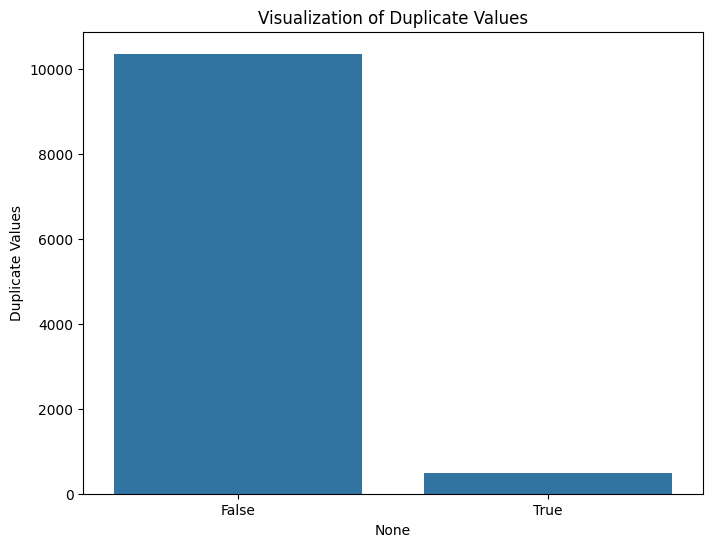

In [ ]:
#Visualize the duplicates
plt.figure(figsize=(8,6))
sns.countplot(x= GPS_da.duplicated())
plt.title("Visualization of Duplicate Values")
plt.ylabel("Duplicate Values")
plt.show()

In [54]:
Missing_val= GPS_da.isna().sum()
Missing_val.sort_values(ascending= False)

,0
Rating,1474
Current Ver,8
Android Ver,3
Content Rating,1
Type,1
Size,0
Reviews,0
Category,0
App,0
Price,0


In [55]:
#Data Cleaning
GPS_da= GPS_da.dropna(subset=['Rating'])
for column in GPS_da.columns :
  GPS_da[column].fillna(GPS_da[column].mode()[0],inplace=True)
  GPS_da.drop_duplicates(inplace=True)
  GPS_da= GPS_da[GPS_da['Rating']<=5]
  reviews_da.dropna(subset=['Translated_Review'], inplace= True)


/tmp/ipython-input-2631360522.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-2631360522.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [56]:
unique_GPS= GPS_da.shape[0]
unique_GPS

8892

In [57]:
unique_rev= reviews_da.shape[0]
unique_rev

37427

In [58]:
#lets reset the index to view the unique data
GPS_da.reset_index(drop= True, inplace= True)

In [59]:
reviews_da.reset_index(drop= True, inplace= True)

In [ ]:
GPS_da

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8888,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8889,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8890,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
reviews_da

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
37422,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
37423,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
37424,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
37425,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


##What did we know and learned from the data?
####There are 2 datafiles Play Store Data.csv and User Reviews.csv
####The Play Store Data contained 10841 rows and 13 columns before the cleaning process.
####The User Reviews contained 64295 rows and 5 columns.
####After deleting the duplicates the Play Store Data dataset now contains 8892 rows.
####After deleting the duplicates the User Reviews dataset now contains 37427 rows.


###Data Wrangling

In [60]:
#Convert the Installs columns to numeric by removing commas and +
GPS_da['Installs']= GPS_da['Installs'].str.replace(',','').str.replace('+','').astype(int)

#Convert Price column to numeric after removing $
GPS_da['Price']= GPS_da['Price'].str.replace('$','').astype(float)

In [61]:
GPS_da.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [62]:
merged_df= pd.merge(GPS_da, reviews_da, on='App', how='inner')

In [63]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [64]:
def convert_size(size):
  if 'M' in size:
    return float(size.replace('M',''))
  elif 'k' in size:
    return float(size.replace('k',''))/1024
  else:
    return np.nan

GPS_da['Size']= GPS_da['Size'].apply(convert_size)

In [65]:
#Logarathmic

GPS_da['Log_Installs']=np.log(GPS_da['Installs'])
GPS_da ['Reviews']=GPS_da['Reviews'].astype(int)
GPS_da['Log_Reviews']=np.log(GPS_da['Reviews'])

In [66]:
def rating_group(rating):
  if rating >= 4:
    return 'Top rated app'
  elif rating >= 3:
    return 'Above Average'
  elif rating >= 2:
    return 'Average'
  else:
    return 'Below Average'

GPS_da['Rating_Group']= GPS_da['Rating'].apply(rating_group)

In [67]:
#Revenue column
GPS_da['Revenue']= GPS_da['Price']*GPS_da['Installs']

In [68]:
sia= SentimentIntensityAnalyzer()

In [69]:
reviews_da['Sentiment_Score']= reviews_da['Translated_Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [ ]:
reviews_da.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [70]:
GPS_da['Last Updated']= pd.to_datetime(GPS_da['Last Updated'], errors= 'coerce')

In [71]:
GPS_da['Year']= GPS_da['Last Updated'].dt.year

In [ ]:
GPS_da

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_Group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated app,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above Average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated app,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated app,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated app,0.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,6.214608,1.945910,Top rated app,0.0,2017
8888,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,8.517193,3.637586,Top rated app,0.0,2017
8889,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,4.605170,1.386294,Top rated app,0.0,2018
8890,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,6.907755,4.736198,Top rated app,0.0,2015


##HTML File Container

In [72]:
html_files_path= "/content/HTML File Container"

In [73]:
os.makedirs(html_files_path, exist_ok=True)

In [74]:
plot_containers= ""

##Task 1. Visualize the sentiment distribution (positive, neutral, negative) of user reviews using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5 stars). Include only apps with more than 1,000 reviews and group by the top 5 categories

In [75]:
# Filter apps with more than 1000 reviews
filtered_apps= GPS_da[GPS_da['Reviews']> 1000]

# Get top 5 categories with the most apps
top_categories= filtered_apps['Category'].value_counts().head(5).index
filtered_apps= filtered_apps[filtered_apps['Category'].isin(top_categories)]

# Define Sentiment label based on Sentiment_Score
def classify_sentiment(score):
  if score > 0.05:
    return "Positive"
  elif score < -0.05:
    return "Negative"
  else:
    return "Neutral"

reviews_da['Sentiment_Label']= reviews_da['Sentiment_Score'].apply(classify_sentiment)

# Merge with Ratings and categorize with rating groups
merge_df= pd.merge(filtered_apps, reviews_da, on='App', how='inner')

def rating_group(rating):
    if rating >= 4.0:
        return "4-5 Stars"
    elif rating >= 3.0:
        return "3-4 Stars"
    else:
        return "1-2 Stars"

merge_df['Rating_Group'] = merged_df['Rating'].apply(rating_group)
# Group by Category, Rating Group, and Sentiment
sentiment_counts = merge_df.groupby(['Category', 'Rating_Group', 'Sentiment_Label']).size().reset_index(name='Count')

# Create a Stacked Bar Chart using Plotly
fig1 = px.bar(
    sentiment_counts,
    x="Category",
    y="Count",
    color="Sentiment_Label",
    facet_col="Rating_Group",  # Separate by Rating Groups
    barmode="stack",
    title="Sentiment Distribution by Rating Group (Top 5 Categories)",
    labels={"Count": "Number of Reviews", "Sentiment_Label": "Sentiment"},
    color_discrete_map={"Positive": "green", "Neutral": "gray", "Negative": "red"},
)

fig1.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Reviews",
    plot_bgcolor="#243447",
    paper_bgcolor="#1e2a38",
    font=dict(color="white")
    )
fig1.show()


##Task 2. Create a scatter plot to visualize the relationship between revenue and the number of installs for paid apps only. Add a trendline to show the correlation and color-code the points based on app categories.

In [76]:
# Filter only paid apps
paid_apps = GPS_da[GPS_da['Type'] == 'Paid']

# Remove apps with zero installs or zero revenue to avoid log errors (optional but recommended)
paid_apps = paid_apps[(paid_apps['Installs'] > 0) & (paid_apps['Revenue'] > 0)]

# Create scatter plot with trendline
fig2 = px.scatter(
    paid_apps,
    x='Installs',
    y='Revenue',
    color='Category',
    trendline='ols',
    title='Revenue vs Installs for Paid Apps by Category',
    labels={'Revenue': 'App Revenue ($)', 'Installs': 'Number of Installs'},
    hover_data=['App', 'Price']
)

fig2.update_layout(
    xaxis_type='log',
    yaxis_type='log',
    template='plotly_white',
    plot_bgcolor="#243447",
    paper_bgcolor="#1e2a38",
    font=dict(color="white")
)

fig2.show()


##Task 3. Generate a word cloud for the most frequent keywords found in 5-star reviews, but exclude common stopwords and app names. Additionally, filter the reviews to include only those from apps in the "Health & Fitness" category.

In [77]:
from wordcloud import WordCloud, STOPWORDS
import re
import plotly.graph_objects as go

# Prepare app names to filter out later
health_fitness_apps = GPS_da[GPS_da['Category'] == 'HEALTH_AND_FITNESS']
health_app_names = set(health_fitness_apps['App'].str.lower().str.strip())

# Filter merged_df for HEALTH_AND_FITNESS apps with Rating >= 4.5 and valid reviews
filtered_reviews = merged_df[
    (merged_df['Category'] == 'HEALTH_AND_FITNESS') &
    (merged_df['Rating'] >= 4.5) &
    (merged_df['Translated_Review'].notnull())
]

# Combine all review text
all_text = " ".join(filtered_reviews['Translated_Review'].astype(str).str.lower())

# Clean text (remove punctuation/numbers)
all_text = re.sub(r'[^a-z\s]', '', all_text)

# Define stopwords and add app names
stopwords = set(STOPWORDS)
stopwords.update(health_app_names)

# Generate word cloud (just to get frequencies)
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    width=1000,
    height=500,
    colormap='viridis',
    max_words=100
).generate(all_text)

# Convert to Plotly format
import random

word_freq = wordcloud.words_
words = list(word_freq.keys())
frequencies = list(word_freq.values())

# Generate random positions
x_vals = [random.uniform(0, 100) for _ in range(len(words))]
y_vals = [random.uniform(0, 100) for _ in range(len(words))]
font_sizes = [freq * 100 for freq in frequencies]  # scale for visibility

# Create Plotly Scatter Plot as Word Cloud
fig3 = go.Figure()

fig3.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='text',
    text=words,
    textfont=dict(size=font_sizes, color='white'),
    hovertext=[f"{word}: {int(freq * 100)}%" for word, freq in word_freq.items()],
    hoverinfo='text'
))

fig3.update_layout(
    title='Interactive Word Cloud: 5-Star Reviews from Health & Fitness Apps',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    height=600,
    margin=dict(t=50, l=10, r=10, b=10),
    plot_bgcolor="#243447",
    paper_bgcolor="#1e2a38",
    font=dict(color="white")
)

fig3.show()

## Task 4. Create an interactive Choropleth map using Plotly to visualize global installs by Category. Apply filters to show data for only the top 5 app categories and highlight category where the number of installs exceeds 1 million. The app category should not start with the characters “A,” “C,” “G,” or “S.” This graph should work only between 6 PM IST and 8 PM IST; apart from that time, we should not show it in the dashboard itself.

In [78]:
from datetime import datetime
import pytz

# Check current IST time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
hour_now = now_ist.hour

#fig4= None

# Apply time condition (6 PM to 8 PM IST)
if 12 <= hour_now < 23 :

    # Filter installs > 1 million and remove categories starting with A, C, G, S
  filtered_df = GPS_da[
      (GPS_da['Installs'] > 1_000_000) &
      (~GPS_da['Category'].str.startswith(('A', 'C', 'G', 'S')))
  ]

    # Get top 5 categories by total installs
  top5_categories = (
      filtered_df.groupby('Category')['Installs'].sum()
      .sort_values(ascending=False)
      .head(5)
      .index
  )

  top_df = filtered_df[filtered_df['Category'].isin(top5_categories)]

    # Generate mock "Country" column (you can update this with real geo-mapping if available)
  import random
  countries = ['United States', 'India', 'Brazil', 'Germany', 'United Kingdom', 'France', 'Japan', 'Russia']
  top_df['Country'] = [random.choice(countries) for _ in range(len(top_df))]

    #Aggregate installs by Country and Category
  map_data = top_df.groupby(['Country', 'Category'])['Installs'].sum().reset_index()

  fig4 = px.choropleth(
      map_data,
      locations="Country",
      locationmode="country names",
      color="Installs",
      hover_name="Country",
      animation_frame="Category",
      title="Global Installs by Category (Filtered & Time Restricted)",
      color_continuous_scale=px.colors.sequential.Plasma
  )

  fig4.update_layout(
      geo=dict(showframe=False, showcoastlines=True),
      plot_bgcolor="#243447",
      paper_bgcolor="#1e2a38",
      font=dict(color="white")
  )

  fig4.show()

else:
  print("Choropleth map is available only between 6 PM to 8 PM IST. Current time:", now_ist.strftime("%H:%M:%S"))

/tmp/ipython-input-3546266978.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Task 5. Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3 app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and android version should be more than 4.0 as well as size should be more than 15M and content rating should be Everyone and app name should not have more than 30 characters including space and special character .this graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this graph in dashboard itself.


In [94]:
from datetime import datetime
import pytz
import pandas as pd
import plotly.graph_objects as go

# Step 1: Get IST Time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
hour_now = now_ist.hour

# Step 2: Time-based control (1 PM – 2 PM IST)
if 13 <= hour_now < 23:

    # Step 3: Filter data based on given conditions
    filtered_df = GPS_da[
        (GPS_da['Installs'] > 10000) &
        (GPS_da['Revenue'] > 10000) &
        (GPS_da['Size'] > 15) &
        (GPS_da['Content Rating'] == 'Everyone') &
        (GPS_da['App'].str.len() <= 30)
    ]

    # Convert Android Version to float where possible
    def android_version_to_float(v):
        try:
            return float(v.split()[0])
        except:
            return None

    filtered_df['Android_Num'] = GPS_da['Android Ver'].apply(android_version_to_float)
    filtered_df = filtered_df[filtered_df['Android_Num'] > 4.0]

    # Step 4: Get Top 3 Categories by Total Installs
    top_categories = (
        filtered_df.groupby('Category')['Installs'].sum()
        .sort_values(ascending=False)
        .head(3)
        .index
    )

    top_df = filtered_df[filtered_df['Category'].isin(top_categories)]

    # Step 5: Group by Type (Free/Paid) and Category
    summary = top_df.groupby(['Category', 'Type']).agg({
        'Installs': 'mean',
        'Revenue': 'mean'
    }).reset_index()

    # Step 6: Create Dual-Axis Chart
    fig5 = go.Figure()

    for t in ['Free', 'Paid']:
        type_data = summary[summary['Type'] == t]
        fig5.add_trace(go.Bar(
            x=type_data['Category'],
            y=type_data['Installs'],
            name=f'{t} Apps - Avg Installs',
            marker_color='blue' if t == 'Free' else 'green',
            yaxis='y1'
        ))

        fig5.add_trace(go.Scatter(
            x=type_data['Category'],
            y=type_data['Revenue'],
            name=f'{t} Apps - Avg Revenue',
            mode='lines+markers',
            line=dict(width=3, dash='dot'),
            yaxis='y2'
        ))

    # Step 7: Layout and Axes Setup
    fig5.update_layout(
        title="Average Installs vs Revenue by App Type (Top 3 Categories)",
        xaxis=dict(title='Category'),
        yaxis=dict(
            title='Avg Installs',
            side='left'
        ),
        yaxis2=dict(
            title='Avg Revenue ($)',
            overlaying='y',
            side='right'
        ),
        legend=dict(x=0.01, y=1.15),
        template='plotly_white',
        height=600,
        plot_bgcolor="#243447",
        paper_bgcolor="#1e2a38",
        font=dict(color="white")
    )

    fig5.show()

else:
    print("This dual-axis chart is only visible between 1 PM to 2 PM IST.")
    print(f"Current IST time: {now_ist.strftime('%H:%M:%S')}")


/tmp/ipython-input-3274966437.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Task 6. Use a grouped bar chart to compare the average rating and total review count for the top 10 app categories by number of installs. Filter out any categories where the average rating is below 4.0 and size below 10 M and last update should be Jan month . this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.

In [80]:
from datetime import datetime
import pytz
import plotly.graph_objects as go

# Get current IST time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
hour_now = now_ist.hour

#fig6= None

# Time condition (between 3 PM and 5 PM IST)
if 15 <= hour_now < 23:

    # Apply filters
  filtered_df = GPS_da[
      (GPS_da['Rating'] >= 4.0) &
      (GPS_da['Size'] > 10) &
      (GPS_da['Last Updated'].dt.month == 1)  # January
  ]

    # Get top 10 categories by total installs
  top10_categories = (
      filtered_df.groupby('Category')['Installs']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index
  )

  top_df = filtered_df[filtered_df['Category'].isin(top10_categories)]

    # Group by Category
  category_stats = top_df.groupby('Category').agg({
      'Rating': 'mean',
      'Reviews': 'sum'
  }).reset_index()

    # Create grouped bar chart
  fig6 = go.Figure()

  fig6.add_trace(go.Bar(
      x=category_stats['Category'],
      y=category_stats['Rating'],
      name='Average Rating',
      marker_color='indigo'
  ))

  fig6.add_trace(go.Bar(
      x=category_stats['Category'],
      y=category_stats['Reviews'],
      name='Total Reviews',
      marker_color='orange',
      yaxis='y2'
  ))

    # Layout for dual bars
  fig6.update_layout(
      title="Average Rating vs Total Review Count (Top 10 Categories)",
      xaxis=dict(title='App Category'),
      yaxis=dict(title='Average Rating', side='left'),
      yaxis2=dict(
          title='Total Reviews',
          overlaying='y',
          side='right',
          showgrid=False
      ),
      barmode='group',
      height=600,
      template='plotly_white',
      legend=dict(x=0.01, y=1.15),
      plot_bgcolor="#243447",
      paper_bgcolor="#1e2a38",
      font=dict(color="white")
  )

  fig6.show()

else:
  print("This grouped bar chart is only visible between 3 PM to 5 PM IST.")
  print(f"Current IST time: {now_ist.strftime('%H:%M:%S')}")

## Task 7. Generate a heatmap to show the correlation matrix between installs, ratings, and review counts. Filter the data to include only apps that have been updated within the last year and have at least 100,000 installs and reviews count should be more than 1k and genres name should not be Starting with characters A , F , E , G , I , K . this graph should work only between 2 PM IST to 4 PM IST apart from that time we should not show this graph in dashboard itself.


In [95]:
from datetime import datetime
import pytz

 # Get current IST time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
hour_now = now_ist.hour

#fig7 = None

 # Task: Only show heatmap between 2 PM and 4 PM IST
if 14 <= hour_now < 23:

     # Filter for apps updated within the last year
  one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
  filtered_df = GPS_da[
      (GPS_da['Last Updated'] >= one_year_ago) &
      (GPS_da['Installs'] >= 100000) &
      (GPS_da['Reviews'] > 1000) &
      (~GPS_da['Genres'].str.startswith(('A', 'F', 'E', 'G', 'I', 'K')))
  ]

  print("Total rows in dataset:", len(GPS_da))
  print("Rows after filtering:", len(filtered_df))

  if len(filtered_df) > 0:
        # Select relevant columns
      corr_df = filtered_df[['Installs', 'Rating', 'Reviews']]

        # Compute correlation matrix
      corr_matrix = corr_df.corr()

         # Create heatmap
      fig7 = px.imshow(
          corr_matrix,
          text_auto=True,
          color_continuous_scale='RdBu_r',
          title="Correlation Heatmap: Installs, Rating, Reviews (Filtered)"
      )

      fig7.update_layout(
          xaxis_title="Features",
          yaxis_title="Features",
          template="plotly_white",
          height=500,
          plot_bgcolor="#243447",
          paper_bgcolor="#1e2a38",
          font=dict(color="white")
      )

      fig7.show()

  else:
    print(" No apps matched the filtering criteria. Heatmap not generated.")

else:
  print("Heatmap is only visible between 2 PM to 4 PM IST.")
  print(f"Current IST time: {now_ist.strftime('%H:%M:%S')}")



Total rows in dataset: 8892
Rows after filtering: 0
 No apps matched the filtering criteria. Heatmap not generated.


## Task 8. Plot a bubble chart to analyze the relationship between app size (in MB) and average rating, with the bubble size representing the number of installs. Include a filter to show only apps with a rating higher than 3.5 and that belong to the Game, Beauty ,business , commics , commication , Dating , Entertainment , social and event categories. Reviews should be greater than 500 and sentiment subjectivity should be more than 0.5 and Installs should be more than 50k as well as this graph should work only between 5 PM IST to 7 PM IST apart from that time we should not show this graph in dashboard itself.

In [87]:
from datetime import datetime
import pytz
import plotly.express as px
import pandas as pd

# Function to clean Size column
def size_to_mb(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith("M"):
            return float(size[:-1])
        elif size.endswith("k"):
            return float(size[:-1]) / 1024
        elif size == "Varies with device":
            return None
    return size

merged_df['Reviews'] = pd.to_numeric(merged_df['Reviews'], errors='coerce')

merged_df['Installs'] = (
    merged_df['Installs']
    .astype(str)
    .str.replace(r'[+,]', '', regex=True)
    .astype(float)
)

merged_df['Size'] = merged_df['Size'].apply(size_to_mb)

# Get current IST time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
hour_now = now_ist.hour

#fig8 = None

# Time window check (5 PM – 7 PM IST)
if 17 <= hour_now < 23:

    # Define allowed categories
  allowed_categories = [
    'GAME', 'BEAUTY', 'BUSINESS', 'COMICS',
    'COMMUNICATION', 'DATING', 'ENTERTAINMENT',
    'SOCIAL', 'EVENT']

    # Filter merged_df
  bubble_df = merged_df[
    (merged_df['Rating'] > 3.5) &
    (merged_df['Category'].str.upper().isin(allowed_categories)) &
    (merged_df['Reviews'] > 500) &
    (merged_df['Sentiment_Subjectivity'] > 0.5) &
    (merged_df['Installs'] > 50000)]

    # Drop null Sizes
  bubble_df = bubble_df[bubble_df['Size'].notnull()]

    # Create bubble chart
  fig8 = px.scatter(
    bubble_df,
    x='Size',
    y='Rating',
    size='Installs',
    color='Category',
    hover_name='App',
    size_max=60,
    title='Bubble Chart: App Size vs Rating (Bubble = Installs)',
    labels={'Size': 'App Size (MB)', 'Rating': 'Average Rating'}
    )
  fig8.update_layout(
    template='plotly_white',
    height=600,
    plot_bgcolor="#243447",
    paper_bgcolor="#1e2a38",
    font=dict(color="white")
    )
  fig8.show()


else:
  print("Bubble chart is only visible between 5 PM to 7 PM IST.")
  print(f"Current IST time: {now_ist.strftime('%H:%M:%S')}")


## Task 9. Create a violin plot to visualize the distribution of ratings for each app category, but only include categories with more than 50 apps and app name should contain letter “C” and exclude apps with fewer than 10 reviews and rating should be less 4.0. this graph should work only between 4 PM IST to 6 PM IST apart from that time we should not show this graph in dashboard itself.

In [88]:
from datetime import datetime
import pytz

# Get IST time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
hour_now = now_ist.hour

#fig9= None

# Time-based display: only 4 PM – 6 PM
if 16 <= hour_now < 23:

    # Filter: rating < 4.0, reviews >= 10, 'C' in app name
  violin_df = GPS_da[
      (GPS_da['Rating'] < 4.0) &
      (GPS_da['Reviews'] >= 10) &
      (GPS_da['App'].str.contains('C', case=False, na=False))
  ]

    # Filter for categories having more than 50 apps
  category_counts = violin_df['Category'].value_counts()
  valid_categories = category_counts[category_counts > 50].index
  violin_df = violin_df[violin_df['Category'].isin(valid_categories)]

    # Create violin plot
  fig9 = px.violin(
      violin_df,
      x='Category',
      y='Rating',
      box=True,
      points='all',
      color='Category',
      title="Rating Distribution per Category (Filtered)",
      labels={'Rating': 'App Rating'},
      template='plotly_white'
  )

  fig9.update_layout(
      height=600,
      showlegend=False,
      xaxis_tickangle=-45,
      plot_bgcolor="#243447",
      paper_bgcolor="#1e2a38",
      font=dict(color="white")
  )

  fig9.show()

else:
  print("Violin plot is only visible between 4 PM and 6 PM IST.")
  print(f"Current IST time: {now_ist.strftime('%H:%M:%S')}")

## Task 10. Plot a time series line chart to show the trend of total installs over time, segmented by app category. Highlight periods of significant growth by shading the areas under the curve where the increase in installs exceeds 20% month-over-month and app name should not starts with x, y ,z and app category should start with letter " E " or " C " or " B " and reviews should be more than 500 as well as this graph should work only between 6 PM IST to 9 PM IST apart from that time we should not show this graph in dashboard itself.

In [89]:
from datetime import datetime
import pytz
import plotly.graph_objects as go

# Get current IST time
ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
hour_now = now_ist.hour

#fig10= None

# Time condition (6 PM to 9 PM IST)
if 18 <= hour_now < 23:

    # Apply filters
  time_df = GPS_da[
      (~GPS_da['App'].str.lower().str.startswith(('x', 'y', 'z'))) &
      (GPS_da['Category'].str.upper().str.startswith(('E', 'C', 'B'))) &
      (GPS_da['Reviews'] > 500)
  ]

    # Extract Year and Month
  time_df['YearMonth'] = GPS_da['Last Updated'].dt.to_period('M')

    # Group by Category & Month
  installs_by_month = time_df.groupby(['YearMonth', 'Category'])['Installs'].sum().reset_index()

    # Convert period to timestamp
  installs_by_month['YearMonth'] = installs_by_month['YearMonth'].astype(str)
  installs_by_month['YearMonth'] = pd.to_datetime(installs_by_month['YearMonth'])

    # Identify significant growth periods
  installs_by_month['Previous_Installs'] = installs_by_month.groupby('Category')['Installs'].shift(1)
  installs_by_month['Growth_%'] = ((installs_by_month['Installs'] - installs_by_month['Previous_Installs']) /
                                     installs_by_month['Previous_Installs']) * 100
  installs_by_month['Significant_Growth'] = installs_by_month['Growth_%'] > 20

    # Plot line chart
  fig10 = go.Figure()

  for category in installs_by_month['Category'].unique():
      cat_data = installs_by_month[installs_by_month['Category'] == category]

        # Line for each category
      fig10.add_trace(go.Scatter(
          x=cat_data['YearMonth'],
          y=cat_data['Installs'],
          mode='lines+markers',
          name=f"{category}",
          line=dict(width=2)
      ))

        # Highlight area under curve where growth > 20%
      fig10.add_trace(go.Scatter(
          x=cat_data['YearMonth'],
          y=cat_data['Installs'].where(cat_data['Significant_Growth']),
          name=f"{category} - High Growth",
          mode='lines',
          fill='tozeroy',
          line=dict(width=0),
          fillcolor='rgba(255, 100, 100, 0.3)',
          showlegend=False
      ))

    # Layout
  fig10.update_layout(
      title="Monthly Install Trend by Category (Highlighted Growth >20%)",
      xaxis_title="Month",
      yaxis_title="Total Installs",
      template='plotly_white',
      height=600,
      plot_bgcolor="#243447",
      paper_bgcolor="#1e2a38",
      font=dict(color="white")
  )

  fig10.show()

else:
  print("Time Series Chart is only visible between 6 PM to 9 PM IST.")
  print(f"Current IST time: {now_ist.strftime('%H:%M:%S')}")

/tmp/ipython-input-2063174591.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
def fig_to_html(fig, include_js=False):
    if fig is None:
        return "<p style='color: red; text-align:center;'>⏳ Chart not available at this time.</p>"
    return pio.to_html(fig, full_html=False, include_plotlyjs="cdn" if include_js else False)

fig1_html = fig_to_html(fig1, include_js=True)
fig2_html = fig_to_html(fig2)
fig3_html = fig_to_html(fig3)
fig4_html = fig_to_html(fig4)
fig5_html = fig_to_html(fig5)
fig6_html = fig_to_html(fig6)
fig7_html = fig_to_html(fig7)
fig8_html = fig_to_html(fig8)
fig9_html = fig_to_html(fig9)
fig10_html = fig_to_html(fig10)

# Dashboard HTML
final_dashboard_html = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>Google Play Store Data Analytics Dashboard</title>
    <style>
        body {{
            background-color: #00BFFF;
            color: #1a1a40;
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
        }}
        h1 {{
            text-align: center;
            padding: 20px;
            background-color: #1a1a1a;
            color: #ffffff;
            font-size: 28px;
        }}
        .dashboard {{
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            gap: 30px;
            padding: 30px;
        }}
        .plot-container {{
            background-color: #1E90FF;
            border-radius: 15px;
            box-shadow: 0 4px 20px rgba(0,0,0,0.3);
            padding: 20px;
            width: 600px;
            height: auto;
            transition: transform 0.3s;
        }}
        .plot-container:hover {{
            transform: scale(1.02);
            box-shadow: 0 8px 24px rgba(0,0,0,0.4);
        }}
        .plot {{
            width: 100%;
            height: auto;
        }}
        h2 {{
            text-align: center;
            color: #222;
        }}
    </style>
</head>
<body>
    <h1>📊 Google Play Store Data Analytics Dashboard</h1>
    <div class="dashboard">
        <div class="plot-container"><h2>Task 1: Sentiment Distribution</h2>{fig1_html}</div>
        <div class="plot-container"><h2>Task 2: Revenue vs Installs (Paid Apps)</h2>{fig2_html}</div>
        <div class="plot-container"><h2>Task 3: Interactive Word Cloud</h2>{fig3_html}</div>
        <div class="plot-container"><h2>Task 4: Global Installs by Category</h2>{fig4_html}</div>
        <div class="plot-container"><h2>Task 5: Avg Installs vs Revenue</h2>{fig5_html}</div>
        <div class="plot-container"><h2>Task 6: Avg Rating vs Reviews</h2>{fig6_html}</div>
        <div class="plot-container"><h2>Task 7: Correlation Heatmap</h2>{fig7_html}</div>
        <div class="plot-container"><h2>Task 8: Bubble Chart (Size vs Rating)</h2>{fig8_html}</div>
        <div class="plot-container"><h2>Task 9: Rating Distribution (Violin)</h2>{fig9_html}</div>
        <div class="plot-container"><h2>Task 10: Monthly Install Trend</h2>{fig10_html}</div>
    </div>
</body>
</html>
"""

# Save Dashboard
dashboard_path = os.path.join(html_files_path, "Live_GPS_Dashboard.html")

with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_dashboard_html)

print(f" Dashboard saved at: {dashboard_path}")


 Dashboard saved at: /content/HTML File Container/Live_GPS_Dashboard.html
